In [1]:
#Basic and most important libraries
import pandas as pd , numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

#Data processing functions
from sklearn.model_selection import train_test_split

#Regressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df1=pd.read_csv('BTP_data.csv')

In [3]:
df1.shape

(150, 6)

In [4]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df1.head(100)

,Methanol/Oil Molar Ratio(Mr),Catalyst Weight (Wc),Reaction Temperature (T),Reaction Time (Tr),yield(%)
0,6,1.0,35,30,96.86
1,6,1.0,65,60,95.50
2,4,0.4,35,30,85.88
3,5,0.7,35,45,93.30
4,5,1.0,50,45,94.90
...,...,...,...,...,...
95,4,0.7,50,45,95.90
96,6,0.4,65,30,98.41
97,6,0.4,65,60,98.10
98,6,0.4,35,30,96.40


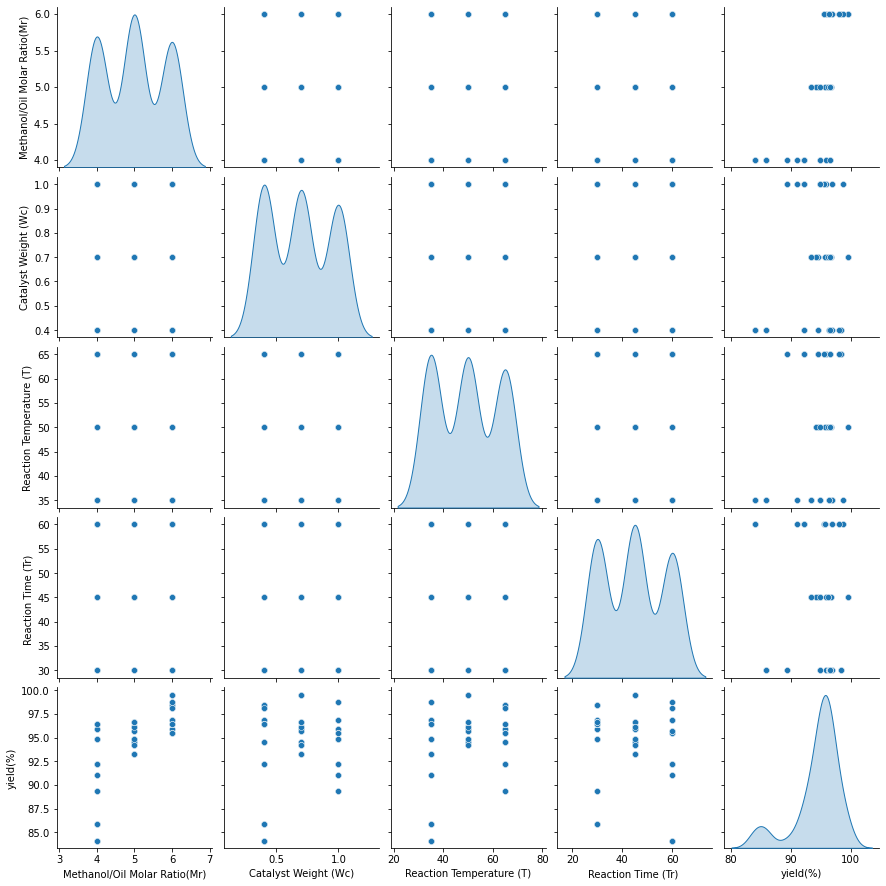

In [6]:
sns.pairplot(df1,diag_kind='kde')

In [7]:
correlation_mat = df1.corr()

<AxesSubplot:>

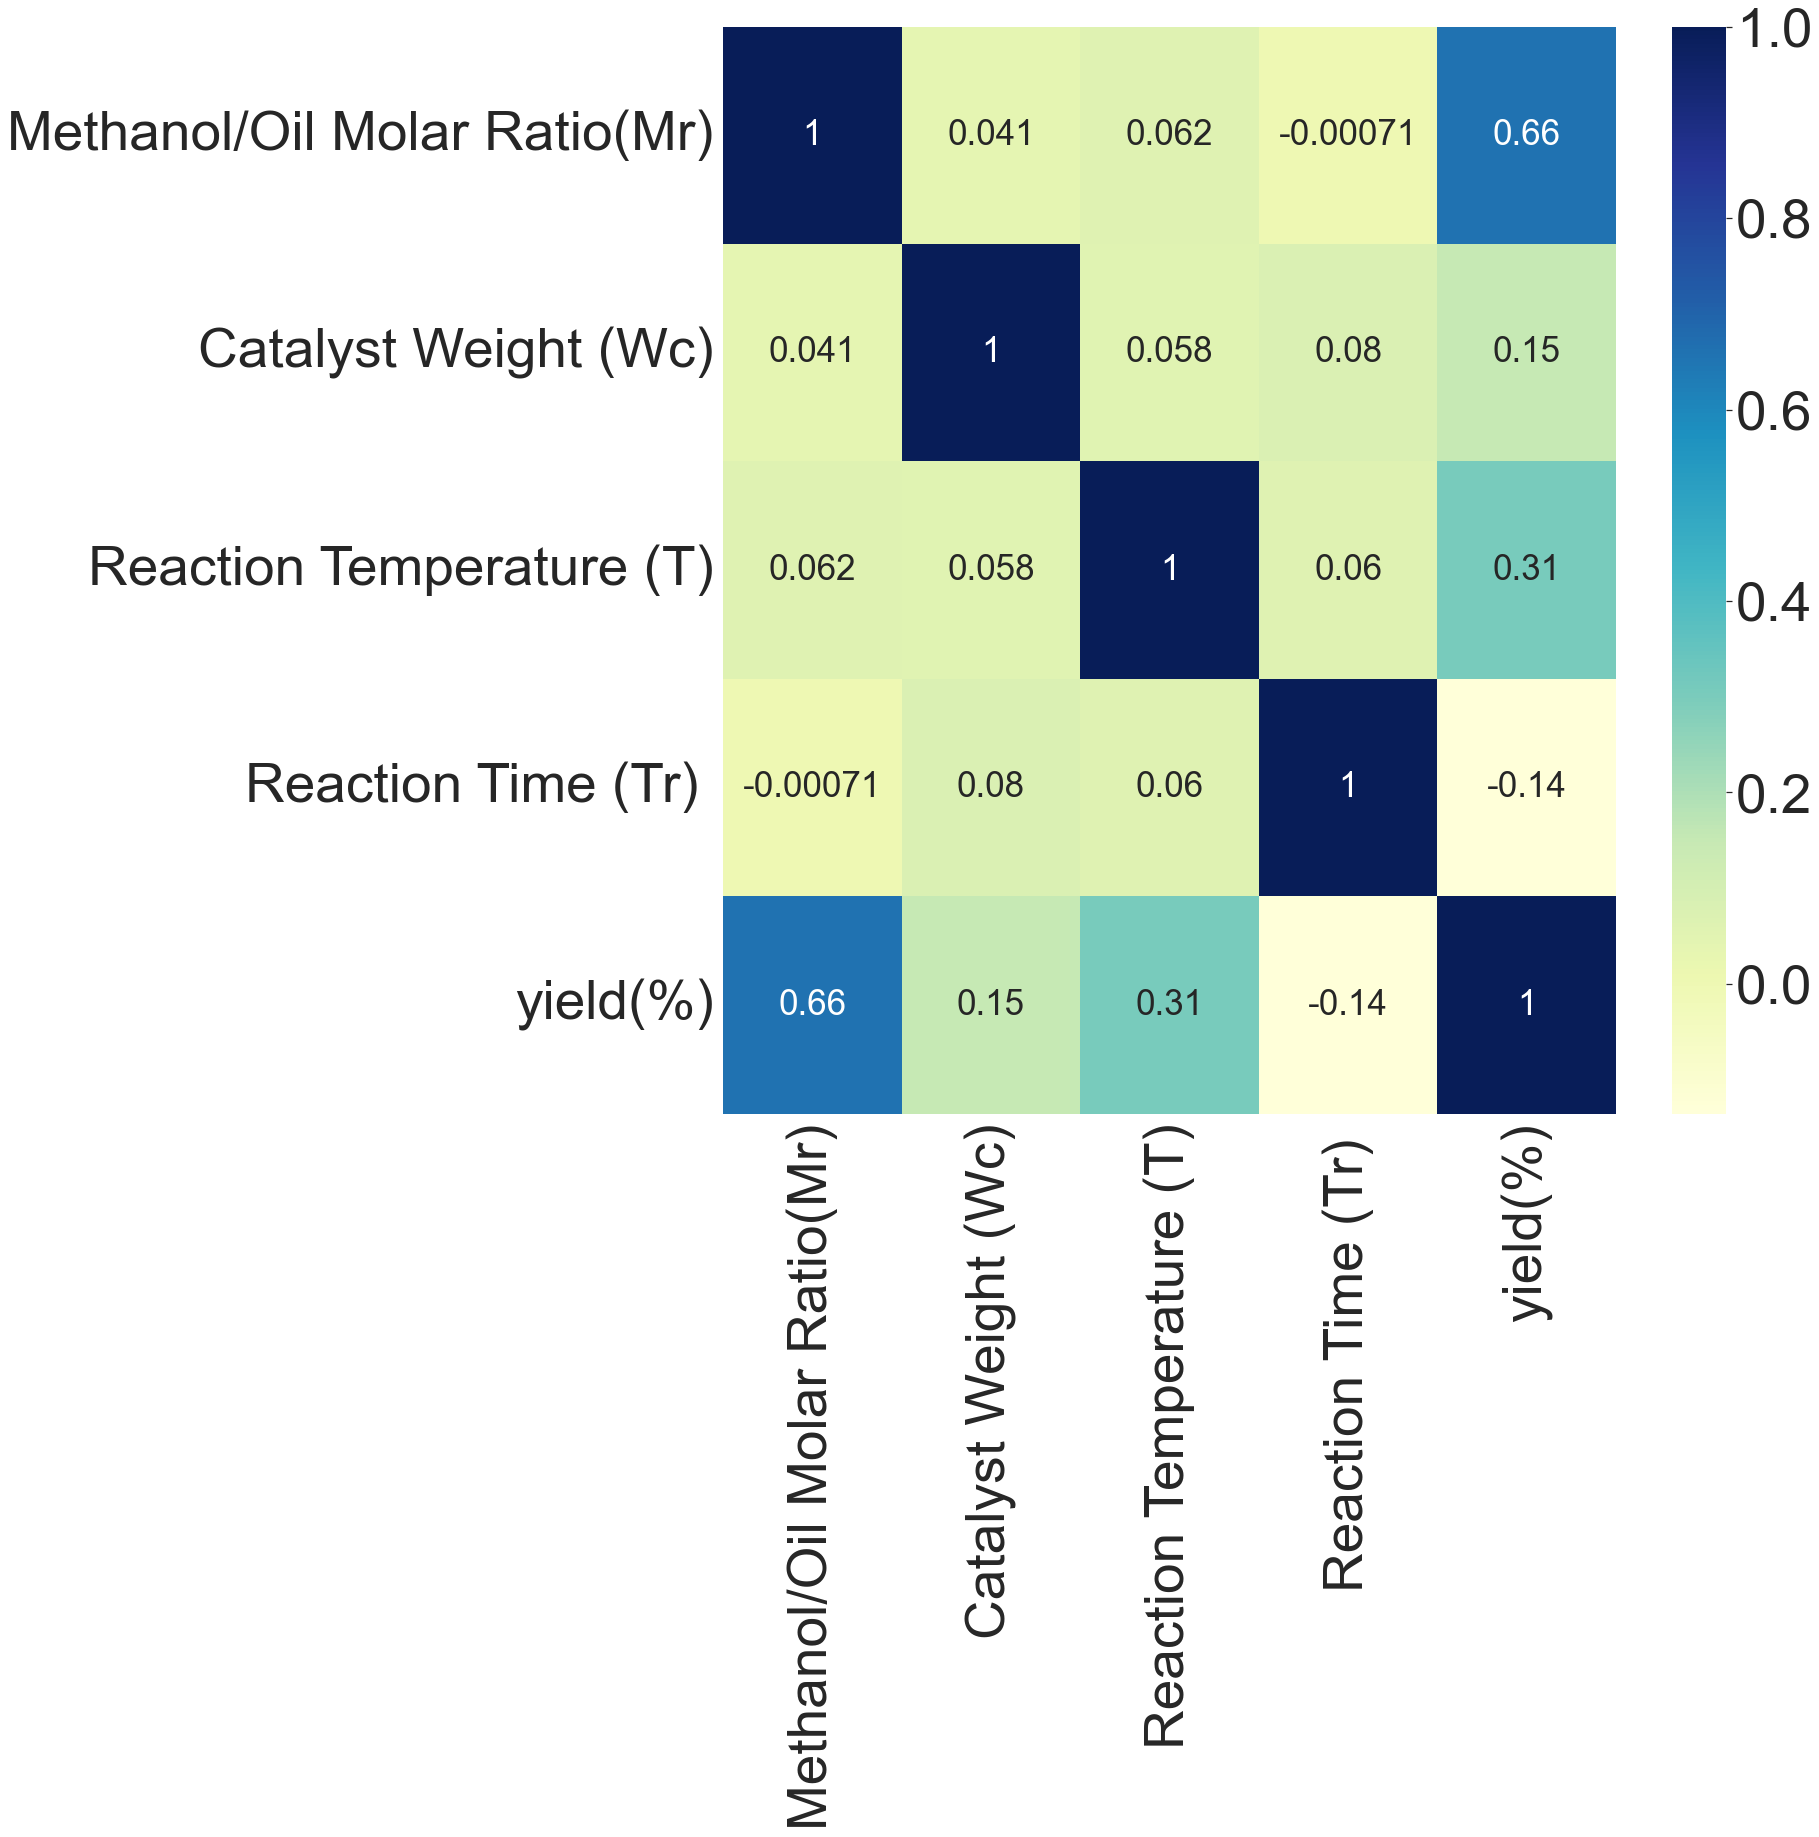

In [8]:
sns.set(font_scale=5.0)
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_mat, annot = True,cmap="YlGnBu",annot_kws={'size': 35})

# Model  Preparation

In [9]:
X=df1.drop(['yield(%)'],axis=1)
y=df1['yield(%)']

In [10]:
X

,Methanol/Oil Molar Ratio(Mr),Catalyst Weight (Wc),Reaction Temperature (T),Reaction Time (Tr)
0,6,1.0,35,30
1,6,1.0,65,60
2,4,0.4,35,30
3,5,0.7,35,45
4,5,1.0,50,45
...,...,...,...,...
145,4,1.0,65,30
146,5,0.7,50,30
147,4,0.4,65,60
148,5,0.7,50,30


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [12]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=4, kernel_initializer='normal', activation='ELU'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
#model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 5, epochs = 4000, verbose=1)

Epoch 1/4000
21/21 [==============================] - 0s 1ms/step - loss: 8874.5039
Epoch 2/4000
21/21 [==============================] - 0s 1ms/step - loss: 8803.4443
Epoch 3/4000
21/21 [==============================] - 0s 1ms/step - loss: 8675.6963
Epoch 4/4000
21/21 [==============================] - 0s 1ms/step - loss: 8458.2852
Epoch 5/4000
21/21 [==============================] - 0s 2ms/step - loss: 8105.9268
Epoch 6/4000
21/21 [==============================] - 0s 2ms/step - loss: 7624.5850
Epoch 7/4000
21/21 [==============================] - 0s 1ms/step - loss: 7027.9883
Epoch 8/4000
21/21 [==============================] - 0s 1ms/step - loss: 6351.0732
Epoch 9/4000
21/21 [==============================] - 0s 1ms/step - loss: 5616.0659
Epoch 10/4000
21/21 [==============================] - 0s 1ms/step - loss: 4864.8813
Epoch 11/4000
21/21 [==============================] - 0s 1ms/step - loss: 4114.6123
Epoch 12/4000
21/21 [==============================] - 0s 1ms/step - loss:

21/21 [==============================] - 0s 2ms/step - loss: 220.8586
Epoch 99/4000
21/21 [==============================] - 0s 1ms/step - loss: 220.4575
Epoch 100/4000
21/21 [==============================] - 0s 949us/step - loss: 220.2770
Epoch 101/4000
21/21 [==============================] - 0s 2ms/step - loss: 219.7829
Epoch 102/4000
21/21 [==============================] - 0s 2ms/step - loss: 219.9977
Epoch 103/4000
21/21 [==============================] - 0s 818us/step - loss: 219.4820
Epoch 104/4000
21/21 [==============================] - 0s 1ms/step - loss: 218.4668
Epoch 105/4000
21/21 [==============================] - 0s 2ms/step - loss: 218.3766
Epoch 106/4000
21/21 [==============================] - 0s 820us/step - loss: 217.8965
Epoch 107/4000
21/21 [==============================] - 0s 1ms/step - loss: 217.7743
Epoch 108/4000
21/21 [==============================] - 0s 2ms/step - loss: 217.8309
Epoch 109/4000
21/21 [==============================] - 0s 786us/step - los

21/21 [==============================] - 0s 2ms/step - loss: 182.4049
Epoch 195/4000
21/21 [==============================] - 0s 2ms/step - loss: 182.0119
Epoch 196/4000
21/21 [==============================] - 0s 2ms/step - loss: 182.1639
Epoch 197/4000
21/21 [==============================] - 0s 862us/step - loss: 184.4504
Epoch 198/4000
21/21 [==============================] - 0s 1ms/step - loss: 180.3739
Epoch 199/4000
21/21 [==============================] - 0s 2ms/step - loss: 181.6300
Epoch 200/4000
21/21 [==============================] - 0s 2ms/step - loss: 179.8552
Epoch 201/4000
21/21 [==============================] - 0s 896us/step - loss: 179.2455
Epoch 202/4000
21/21 [==============================] - 0s 1ms/step - loss: 178.8819
Epoch 203/4000
21/21 [==============================] - 0s 2ms/step - loss: 179.0570
Epoch 204/4000
21/21 [==============================] - 0s 1ms/step - loss: 181.9097
Epoch 205/4000
21/21 [==============================] - 0s 1ms/step - loss: 

21/21 [==============================] - 0s 2ms/step - loss: 140.9136
Epoch 291/4000
21/21 [==============================] - 0s 2ms/step - loss: 139.8362
Epoch 292/4000
21/21 [==============================] - 0s 1ms/step - loss: 139.7747
Epoch 293/4000
21/21 [==============================] - 0s 1ms/step - loss: 140.1108
Epoch 294/4000
21/21 [==============================] - 0s 2ms/step - loss: 138.6222
Epoch 295/4000
21/21 [==============================] - 0s 1ms/step - loss: 138.4938
Epoch 296/4000
21/21 [==============================] - 0s 2ms/step - loss: 139.1467
Epoch 297/4000
21/21 [==============================] - 0s 2ms/step - loss: 137.1511
Epoch 298/4000
21/21 [==============================] - 0s 2ms/step - loss: 137.6149
Epoch 299/4000
21/21 [==============================] - 0s 957us/step - loss: 136.4442
Epoch 300/4000
21/21 [==============================] - 0s 1ms/step - loss: 136.6009
Epoch 301/4000
21/21 [==============================] - 0s 2ms/step - loss: 13

Epoch 386/4000
21/21 [==============================] - 0s 1ms/step - loss: 100.1690
Epoch 387/4000
21/21 [==============================] - 0s 865us/step - loss: 98.9474
Epoch 388/4000
21/21 [==============================] - 0s 2ms/step - loss: 99.6877
Epoch 389/4000
21/21 [==============================] - 0s 787us/step - loss: 99.2512
Epoch 390/4000
21/21 [==============================] - 0s 2ms/step - loss: 97.7977
Epoch 391/4000
21/21 [==============================] - 0s 850us/step - loss: 97.5262
Epoch 392/4000
21/21 [==============================] - 0s 1ms/step - loss: 97.6751
Epoch 393/4000
21/21 [==============================] - 0s 888us/step - loss: 96.5488
Epoch 394/4000
21/21 [==============================] - 0s 1ms/step - loss: 96.3132
Epoch 395/4000
21/21 [==============================] - 0s 2ms/step - loss: 96.0366
Epoch 396/4000
21/21 [==============================] - 0s 1ms/step - loss: 95.8472
Epoch 397/4000
21/21 [==============================] - 0s 842us/st

21/21 [==============================] - 0s 982us/step - loss: 68.6383
Epoch 483/4000
21/21 [==============================] - 0s 1ms/step - loss: 68.1689
Epoch 484/4000
21/21 [==============================] - 0s 2ms/step - loss: 68.2334
Epoch 485/4000
21/21 [==============================] - 0s 790us/step - loss: 67.9593
Epoch 486/4000
21/21 [==============================] - 0s 2ms/step - loss: 68.3419
Epoch 487/4000
21/21 [==============================] - 0s 1ms/step - loss: 66.8444
Epoch 488/4000
21/21 [==============================] - 0s 947us/step - loss: 67.5189
Epoch 489/4000
21/21 [==============================] - 0s 2ms/step - loss: 67.1067
Epoch 490/4000
21/21 [==============================] - 0s 2ms/step - loss: 66.4798
Epoch 491/4000
21/21 [==============================] - 0s 2ms/step - loss: 66.8455
Epoch 492/4000
21/21 [==============================] - 0s 737us/step - loss: 66.6071
Epoch 493/4000
21/21 [==============================] - 0s 1ms/step - loss: 65.9652

21/21 [==============================] - 0s 1ms/step - loss: 53.5845
Epoch 580/4000
21/21 [==============================] - 0s 2ms/step - loss: 54.0912
Epoch 581/4000
21/21 [==============================] - 0s 1ms/step - loss: 53.3238
Epoch 582/4000
21/21 [==============================] - 0s 2ms/step - loss: 53.8067
Epoch 583/4000
21/21 [==============================] - 0s 819us/step - loss: 52.3246
Epoch 584/4000
21/21 [==============================] - 0s 1ms/step - loss: 52.8442
Epoch 585/4000
21/21 [==============================] - 0s 2ms/step - loss: 52.8020
Epoch 586/4000
21/21 [==============================] - 0s 2ms/step - loss: 52.9676
Epoch 587/4000
21/21 [==============================] - 0s 1ms/step - loss: 52.5444
Epoch 588/4000
21/21 [==============================] - 0s 1ms/step - loss: 52.6366
Epoch 589/4000
21/21 [==============================] - 0s 2ms/step - loss: 52.6735
Epoch 590/4000
21/21 [==============================] - 0s 884us/step - loss: 51.9671
Epo

21/21 [==============================] - 0s 1ms/step - loss: 47.4017
Epoch 677/4000
21/21 [==============================] - 0s 1ms/step - loss: 47.1756
Epoch 678/4000
21/21 [==============================] - 0s 1ms/step - loss: 47.2998
Epoch 679/4000
21/21 [==============================] - 0s 870us/step - loss: 47.0921
Epoch 680/4000
21/21 [==============================] - 0s 1ms/step - loss: 47.3968
Epoch 681/4000
21/21 [==============================] - 0s 2ms/step - loss: 46.8173
Epoch 682/4000
21/21 [==============================] - 0s 860us/step - loss: 47.0104
Epoch 683/4000
21/21 [==============================] - 0s 1ms/step - loss: 46.8512
Epoch 684/4000
21/21 [==============================] - 0s 2ms/step - loss: 46.6846
Epoch 685/4000
21/21 [==============================] - 0s 1ms/step - loss: 47.1207
Epoch 686/4000
21/21 [==============================] - 0s 848us/step - loss: 46.8104
Epoch 687/4000
21/21 [==============================] - 0s 1ms/step - loss: 47.0668
E

21/21 [==============================] - 0s 2ms/step - loss: 43.2037
Epoch 774/4000
21/21 [==============================] - 0s 2ms/step - loss: 43.5200
Epoch 775/4000
21/21 [==============================] - 0s 2ms/step - loss: 43.7316
Epoch 776/4000
21/21 [==============================] - 0s 2ms/step - loss: 43.3818
Epoch 777/4000
21/21 [==============================] - 0s 758us/step - loss: 43.3487
Epoch 778/4000
21/21 [==============================] - 0s 1ms/step - loss: 42.9513
Epoch 779/4000
21/21 [==============================] - 0s 2ms/step - loss: 44.2641
Epoch 780/4000
21/21 [==============================] - 0s 2ms/step - loss: 43.6089
Epoch 781/4000
21/21 [==============================] - 0s 793us/step - loss: 43.2905
Epoch 782/4000
21/21 [==============================] - 0s 1ms/step - loss: 44.1922
Epoch 783/4000
21/21 [==============================] - 0s 2ms/step - loss: 43.1478
Epoch 784/4000
21/21 [==============================] - 0s 1ms/step - loss: 42.7043
Epo

21/21 [==============================] - 0s 2ms/step - loss: 40.1752
Epoch 871/4000
21/21 [==============================] - 0s 3ms/step - loss: 40.2296
Epoch 872/4000
21/21 [==============================] - 0s 3ms/step - loss: 39.9678
Epoch 873/4000
21/21 [==============================] - 0s 2ms/step - loss: 39.4444
Epoch 874/4000
21/21 [==============================] - 0s 2ms/step - loss: 39.4731
Epoch 875/4000
21/21 [==============================] - 0s 2ms/step - loss: 39.5830
Epoch 876/4000
21/21 [==============================] - 0s 2ms/step - loss: 39.6007
Epoch 877/4000
21/21 [==============================] - 0s 2ms/step - loss: 39.3827
Epoch 878/4000
21/21 [==============================] - 0s 2ms/step - loss: 39.6076
Epoch 879/4000
21/21 [==============================] - 0s 2ms/step - loss: 39.2166
Epoch 880/4000
21/21 [==============================] - 0s 2ms/step - loss: 39.1976
Epoch 881/4000
21/21 [==============================] - 0s 2ms/step - loss: 39.6902
Epoch 8

21/21 [==============================] - 0s 2ms/step - loss: 36.6699
Epoch 968/4000
21/21 [==============================] - 0s 3ms/step - loss: 36.0737
Epoch 969/4000
21/21 [==============================] - 0s 3ms/step - loss: 36.1350
Epoch 970/4000
21/21 [==============================] - 0s 3ms/step - loss: 36.0651
Epoch 971/4000
21/21 [==============================] - 0s 3ms/step - loss: 36.2680
Epoch 972/4000
21/21 [==============================] - 0s 2ms/step - loss: 36.6276
Epoch 973/4000
21/21 [==============================] - 0s 3ms/step - loss: 35.9820
Epoch 974/4000
21/21 [==============================] - 0s 3ms/step - loss: 36.4486
Epoch 975/4000
21/21 [==============================] - 0s 3ms/step - loss: 36.0767
Epoch 976/4000
21/21 [==============================] - 0s 3ms/step - loss: 36.4286
Epoch 977/4000
21/21 [==============================] - 0s 3ms/step - loss: 35.9536
Epoch 978/4000
21/21 [==============================] - 0s 3ms/step - loss: 36.8851
Epoch 9

Epoch 1064/4000
21/21 [==============================] - 0s 3ms/step - loss: 33.1031
Epoch 1065/4000
21/21 [==============================] - 0s 3ms/step - loss: 33.5648
Epoch 1066/4000
21/21 [==============================] - 0s 3ms/step - loss: 34.0651
Epoch 1067/4000
21/21 [==============================] - 0s 3ms/step - loss: 33.9473
Epoch 1068/4000
21/21 [==============================] - 0s 3ms/step - loss: 32.8506
Epoch 1069/4000
21/21 [==============================] - 0s 3ms/step - loss: 32.9583
Epoch 1070/4000
21/21 [==============================] - 0s 3ms/step - loss: 33.2417
Epoch 1071/4000
21/21 [==============================] - 0s 2ms/step - loss: 32.6397
Epoch 1072/4000
21/21 [==============================] - 0s 3ms/step - loss: 33.6655
Epoch 1073/4000
21/21 [==============================] - 0s 3ms/step - loss: 33.7975
Epoch 1074/4000
21/21 [==============================] - 0s 3ms/step - loss: 33.3788
Epoch 1075/4000
21/21 [==============================] - 0s 3ms/s

21/21 [==============================] - 0s 3ms/step - loss: 29.8708
Epoch 1161/4000
21/21 [==============================] - 0s 2ms/step - loss: 30.0493
Epoch 1162/4000
21/21 [==============================] - 0s 2ms/step - loss: 29.9975
Epoch 1163/4000
21/21 [==============================] - 0s 2ms/step - loss: 29.9328
Epoch 1164/4000
21/21 [==============================] - 0s 2ms/step - loss: 29.8056
Epoch 1165/4000
21/21 [==============================] - 0s 2ms/step - loss: 29.6476
Epoch 1166/4000
21/21 [==============================] - 0s 2ms/step - loss: 30.0991
Epoch 1167/4000
21/21 [==============================] - 0s 2ms/step - loss: 30.2308
Epoch 1168/4000
21/21 [==============================] - 0s 2ms/step - loss: 30.5885
Epoch 1169/4000
21/21 [==============================] - 0s 2ms/step - loss: 30.6389
Epoch 1170/4000
21/21 [==============================] - 0s 2ms/step - loss: 29.7218
Epoch 1171/4000
21/21 [==============================] - 0s 2ms/step - loss: 29.9

21/21 [==============================] - 0s 3ms/step - loss: 27.4205
Epoch 1257/4000
21/21 [==============================] - 0s 4ms/step - loss: 27.0967
Epoch 1258/4000
21/21 [==============================] - 0s 4ms/step - loss: 26.9548
Epoch 1259/4000
21/21 [==============================] - 0s 2ms/step - loss: 27.1698
Epoch 1260/4000
21/21 [==============================] - 0s 3ms/step - loss: 26.9400
Epoch 1261/4000
21/21 [==============================] - 0s 2ms/step - loss: 27.2364
Epoch 1262/4000
21/21 [==============================] - 0s 4ms/step - loss: 26.9795
Epoch 1263/4000
21/21 [==============================] - 0s 3ms/step - loss: 26.7782
Epoch 1264/4000
21/21 [==============================] - 0s 2ms/step - loss: 27.0959
Epoch 1265/4000
21/21 [==============================] - 0s 2ms/step - loss: 27.0308
Epoch 1266/4000
21/21 [==============================] - 0s 2ms/step - loss: 26.8912
Epoch 1267/4000
21/21 [==============================] - 0s 2ms/step - loss: 26.9

21/21 [==============================] - 0s 2ms/step - loss: 24.5120
Epoch 1353/4000
21/21 [==============================] - 0s 2ms/step - loss: 24.5077
Epoch 1354/4000
21/21 [==============================] - 0s 2ms/step - loss: 24.3275
Epoch 1355/4000
21/21 [==============================] - 0s 2ms/step - loss: 24.3582
Epoch 1356/4000
21/21 [==============================] - 0s 2ms/step - loss: 25.1708
Epoch 1357/4000
21/21 [==============================] - 0s 2ms/step - loss: 24.1738
Epoch 1358/4000
21/21 [==============================] - 0s 2ms/step - loss: 24.8286
Epoch 1359/4000
21/21 [==============================] - 0s 2ms/step - loss: 24.2089
Epoch 1360/4000
21/21 [==============================] - 0s 2ms/step - loss: 24.9026
Epoch 1361/4000
21/21 [==============================] - 0s 2ms/step - loss: 24.7405
Epoch 1362/4000
21/21 [==============================] - 0s 2ms/step - loss: 24.2459
Epoch 1363/4000
21/21 [==============================] - 0s 2ms/step - loss: 23.9

21/21 [==============================] - 0s 2ms/step - loss: 22.0194
Epoch 1449/4000
21/21 [==============================] - 0s 2ms/step - loss: 22.0203
Epoch 1450/4000
21/21 [==============================] - 0s 3ms/step - loss: 22.2121
Epoch 1451/4000
21/21 [==============================] - 0s 3ms/step - loss: 22.1436
Epoch 1452/4000
21/21 [==============================] - 0s 3ms/step - loss: 22.1304
Epoch 1453/4000
21/21 [==============================] - 0s 3ms/step - loss: 21.5502
Epoch 1454/4000
21/21 [==============================] - 0s 3ms/step - loss: 21.8926
Epoch 1455/4000
21/21 [==============================] - 0s 3ms/step - loss: 21.9715
Epoch 1456/4000
21/21 [==============================] - 0s 4ms/step - loss: 21.5118
Epoch 1457/4000
21/21 [==============================] - 0s 6ms/step - loss: 21.5956
Epoch 1458/4000
21/21 [==============================] - 0s 3ms/step - loss: 21.6645
Epoch 1459/4000
21/21 [==============================] - 0s 2ms/step - loss: 21.4

21/21 [==============================] - 0s 4ms/step - loss: 19.4420
Epoch 1545/4000
21/21 [==============================] - 0s 2ms/step - loss: 19.4828
Epoch 1546/4000
21/21 [==============================] - 0s 3ms/step - loss: 19.5364
Epoch 1547/4000
21/21 [==============================] - 0s 2ms/step - loss: 19.7070
Epoch 1548/4000
21/21 [==============================] - 0s 3ms/step - loss: 19.7849
Epoch 1549/4000
21/21 [==============================] - 0s 2ms/step - loss: 19.3931
Epoch 1550/4000
21/21 [==============================] - 0s 2ms/step - loss: 19.5227
Epoch 1551/4000
21/21 [==============================] - 0s 3ms/step - loss: 19.2131
Epoch 1552/4000
21/21 [==============================] - 0s 2ms/step - loss: 19.3590
Epoch 1553/4000
21/21 [==============================] - 0s 3ms/step - loss: 19.0232
Epoch 1554/4000
21/21 [==============================] - 0s 2ms/step - loss: 19.0176
Epoch 1555/4000
21/21 [==============================] - 0s 3ms/step - loss: 19.4

21/21 [==============================] - 0s 4ms/step - loss: 16.8870
Epoch 1641/4000
21/21 [==============================] - 0s 3ms/step - loss: 17.2446
Epoch 1642/4000
21/21 [==============================] - 0s 3ms/step - loss: 17.5957
Epoch 1643/4000
21/21 [==============================] - 0s 3ms/step - loss: 17.2820
Epoch 1644/4000
21/21 [==============================] - 0s 2ms/step - loss: 16.9454
Epoch 1645/4000
21/21 [==============================] - 0s 2ms/step - loss: 16.8939
Epoch 1646/4000
21/21 [==============================] - 0s 2ms/step - loss: 16.9187
Epoch 1647/4000
21/21 [==============================] - 0s 2ms/step - loss: 16.8380
Epoch 1648/4000
21/21 [==============================] - 0s 2ms/step - loss: 16.8873
Epoch 1649/4000
21/21 [==============================] - 0s 2ms/step - loss: 16.8116
Epoch 1650/4000
21/21 [==============================] - 0s 2ms/step - loss: 17.0800
Epoch 1651/4000
21/21 [==============================] - 0s 2ms/step - loss: 16.8

21/21 [==============================] - 0s 2ms/step - loss: 15.2199
Epoch 1737/4000
21/21 [==============================] - 0s 3ms/step - loss: 14.9830
Epoch 1738/4000
21/21 [==============================] - 0s 2ms/step - loss: 15.0613
Epoch 1739/4000
21/21 [==============================] - 0s 2ms/step - loss: 15.0146
Epoch 1740/4000
21/21 [==============================] - 0s 2ms/step - loss: 14.7201
Epoch 1741/4000
21/21 [==============================] - 0s 2ms/step - loss: 15.0049
Epoch 1742/4000
21/21 [==============================] - 0s 2ms/step - loss: 14.8330
Epoch 1743/4000
21/21 [==============================] - 0s 2ms/step - loss: 14.9960
Epoch 1744/4000
21/21 [==============================] - 0s 2ms/step - loss: 14.7816
Epoch 1745/4000
21/21 [==============================] - 0s 2ms/step - loss: 15.0393
Epoch 1746/4000
21/21 [==============================] - 0s 2ms/step - loss: 15.1273
Epoch 1747/4000
21/21 [==============================] - 0s 2ms/step - loss: 14.6

21/21 [==============================] - 0s 2ms/step - loss: 13.2607
Epoch 1833/4000
21/21 [==============================] - 0s 2ms/step - loss: 13.0267
Epoch 1834/4000
21/21 [==============================] - 0s 2ms/step - loss: 12.9463
Epoch 1835/4000
21/21 [==============================] - 0s 2ms/step - loss: 13.1836
Epoch 1836/4000
21/21 [==============================] - 0s 2ms/step - loss: 13.2215
Epoch 1837/4000
21/21 [==============================] - 0s 2ms/step - loss: 13.6241
Epoch 1838/4000
21/21 [==============================] - 0s 2ms/step - loss: 13.1974
Epoch 1839/4000
21/21 [==============================] - 0s 2ms/step - loss: 13.1949
Epoch 1840/4000
21/21 [==============================] - 0s 2ms/step - loss: 12.9733
Epoch 1841/4000
21/21 [==============================] - 0s 2ms/step - loss: 13.0095
Epoch 1842/4000
21/21 [==============================] - 0s 2ms/step - loss: 12.8784
Epoch 1843/4000
21/21 [==============================] - 0s 2ms/step - loss: 12.8

21/21 [==============================] - 0s 2ms/step - loss: 11.5223
Epoch 1929/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.4885
Epoch 1930/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.8074
Epoch 1931/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.6733
Epoch 1932/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.4254
Epoch 1933/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.4774
Epoch 1934/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.3952
Epoch 1935/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.3178
Epoch 1936/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.6251
Epoch 1937/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.4801
Epoch 1938/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.4087
Epoch 1939/4000
21/21 [==============================] - 0s 2ms/step - loss: 11.2

21/21 [==============================] - 0s 2ms/step - loss: 9.9943
Epoch 2025/4000
21/21 [==============================] - 0s 2ms/step - loss: 10.0515
Epoch 2026/4000
21/21 [==============================] - 0s 2ms/step - loss: 9.9340
Epoch 2027/4000
21/21 [==============================] - 0s 2ms/step - loss: 10.4932
Epoch 2028/4000
21/21 [==============================] - 0s 2ms/step - loss: 10.3433
Epoch 2029/4000
21/21 [==============================] - 0s 2ms/step - loss: 10.4723
Epoch 2030/4000
21/21 [==============================] - 0s 2ms/step - loss: 9.9358
Epoch 2031/4000
21/21 [==============================] - 0s 2ms/step - loss: 10.3830
Epoch 2032/4000
21/21 [==============================] - 0s 2ms/step - loss: 9.6726
Epoch 2033/4000
21/21 [==============================] - 0s 2ms/step - loss: 10.1808
Epoch 2034/4000
21/21 [==============================] - 0s 2ms/step - loss: 9.9082
Epoch 2035/4000
21/21 [==============================] - 0s 2ms/step - loss: 9.7886
Ep

21/21 [==============================] - 0s 2ms/step - loss: 8.8959
Epoch 2122/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.9294
Epoch 2123/4000
21/21 [==============================] - 0s 2ms/step - loss: 9.4555
Epoch 2124/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.8886
Epoch 2125/4000
21/21 [==============================] - 0s 2ms/step - loss: 9.0974
Epoch 2126/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.9934
Epoch 2127/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.9487
Epoch 2128/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.7674
Epoch 2129/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.7304
Epoch 2130/4000
21/21 [==============================] - 0s 2ms/step - loss: 9.0735
Epoch 2131/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.8815
Epoch 2132/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.6898
Epoch 21

21/21 [==============================] - 0s 2ms/step - loss: 8.1739
Epoch 2219/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.8843
Epoch 2220/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.0087
Epoch 2221/4000
21/21 [==============================] - 0s 3ms/step - loss: 8.1477
Epoch 2222/4000
21/21 [==============================] - 0s 3ms/step - loss: 8.3700
Epoch 2223/4000
21/21 [==============================] - 0s 3ms/step - loss: 8.2595
Epoch 2224/4000
21/21 [==============================] - 0s 3ms/step - loss: 8.2395
Epoch 2225/4000
21/21 [==============================] - 0s 3ms/step - loss: 7.9924
Epoch 2226/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.0758
Epoch 2227/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.2028
Epoch 2228/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.7801
Epoch 2229/4000
21/21 [==============================] - 0s 2ms/step - loss: 8.1621
Epoch 22

21/21 [==============================] - 0s 2ms/step - loss: 7.3518
Epoch 2316/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.7651
Epoch 2317/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.2852
Epoch 2318/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.5954
Epoch 2319/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.9907
Epoch 2320/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.4023
Epoch 2321/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.8539
Epoch 2322/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.9065
Epoch 2323/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.4629
Epoch 2324/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.3779
Epoch 2325/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.2666
Epoch 2326/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.2925
Epoch 23

21/21 [==============================] - 0s 2ms/step - loss: 7.1181
Epoch 2413/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.1376
Epoch 2414/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.9305
Epoch 2415/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.1648
Epoch 2416/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.0294
Epoch 2417/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.1191
Epoch 2418/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.2596
Epoch 2419/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.1398
Epoch 2420/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.3111
Epoch 2421/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.0499
Epoch 2422/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.1748
Epoch 2423/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.9725
Epoch 24

21/21 [==============================] - 0s 2ms/step - loss: 6.6968
Epoch 2510/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7616
Epoch 2511/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7624
Epoch 2512/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8583
Epoch 2513/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8014
Epoch 2514/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7663
Epoch 2515/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7767
Epoch 2516/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8892
Epoch 2517/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8997
Epoch 2518/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.3306
Epoch 2519/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.2643
Epoch 2520/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.1870
Epoch 25

21/21 [==============================] - 0s 2ms/step - loss: 6.8098
Epoch 2607/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.9183
Epoch 2608/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8262
Epoch 2609/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5714
Epoch 2610/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8064
Epoch 2611/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5966
Epoch 2612/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.0585
Epoch 2613/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8958
Epoch 2614/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7434
Epoch 2615/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7069
Epoch 2616/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5686
Epoch 2617/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6164
Epoch 26

21/21 [==============================] - 0s 2ms/step - loss: 6.5564
Epoch 2704/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6048
Epoch 2705/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5859
Epoch 2706/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4879
Epoch 2707/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4747
Epoch 2708/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7447
Epoch 2709/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6198
Epoch 2710/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5928
Epoch 2711/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8301
Epoch 2712/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.1664
Epoch 2713/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.3008
Epoch 2714/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5019
Epoch 27

21/21 [==============================] - 0s 2ms/step - loss: 6.4443
Epoch 2801/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.0193
Epoch 2802/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4696
Epoch 2803/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7481
Epoch 2804/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8143
Epoch 2805/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.7342
Epoch 2806/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.0029
Epoch 2807/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6729
Epoch 2808/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.1999
Epoch 2809/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5144
Epoch 2810/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5661
Epoch 2811/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8969
Epoch 28

21/21 [==============================] - 0s 2ms/step - loss: 6.6201
Epoch 2898/4000
21/21 [==============================] - 0s 3ms/step - loss: 6.6140
Epoch 2899/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5741
Epoch 2900/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5543
Epoch 2901/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.3700
Epoch 2902/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.6540
Epoch 2903/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7382
Epoch 2904/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.3178
Epoch 2905/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.2722
Epoch 2906/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.3842
Epoch 2907/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4142
Epoch 2908/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5926
Epoch 29

21/21 [==============================] - 0s 3ms/step - loss: 6.4739
Epoch 2995/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5970
Epoch 2996/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6555
Epoch 2997/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5489
Epoch 2998/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4591
Epoch 2999/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5498
Epoch 3000/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5100
Epoch 3001/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5250
Epoch 3002/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5506
Epoch 3003/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6793
Epoch 3004/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7977
Epoch 3005/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.3565
Epoch 30

21/21 [==============================] - 0s 2ms/step - loss: 6.6352
Epoch 3092/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4498
Epoch 3093/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4787
Epoch 3094/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4422
Epoch 3095/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4736
Epoch 3096/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4642
Epoch 3097/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6589
Epoch 3098/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5049
Epoch 3099/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5039
Epoch 3100/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.9223
Epoch 3101/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.9087
Epoch 3102/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5413
Epoch 31

21/21 [==============================] - 0s 2ms/step - loss: 6.4078
Epoch 3189/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6011
Epoch 3190/4000
21/21 [==============================] - 0s 3ms/step - loss: 6.7521
Epoch 3191/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4586
Epoch 3192/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8712
Epoch 3193/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6445
Epoch 3194/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8573
Epoch 3195/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5286
Epoch 3196/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.3767
Epoch 3197/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.4228
Epoch 3198/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.3150
Epoch 3199/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5339
Epoch 32

21/21 [==============================] - 0s 2ms/step - loss: 6.4478
Epoch 3286/4000
21/21 [==============================] - 0s 3ms/step - loss: 6.6953
Epoch 3287/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.3664
Epoch 3288/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7000
Epoch 3289/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7814
Epoch 3290/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4663
Epoch 3291/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4634
Epoch 3292/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4686
Epoch 3293/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6819
Epoch 3294/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5248
Epoch 3295/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4205
Epoch 3296/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4688
Epoch 32

21/21 [==============================] - 0s 3ms/step - loss: 6.5035
Epoch 3383/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.4538
Epoch 3384/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7059
Epoch 3385/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5327
Epoch 3386/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7122
Epoch 3387/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.6479
Epoch 3388/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8040
Epoch 3389/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.9221
Epoch 3390/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4182
Epoch 3391/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7587
Epoch 3392/4000
21/21 [==============================] - 0s 3ms/step - loss: 6.4648
Epoch 3393/4000
21/21 [==============================] - 0s 3ms/step - loss: 6.6405
Epoch 33

21/21 [==============================] - 0s 2ms/step - loss: 6.9057
Epoch 3480/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5964
Epoch 3481/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4785
Epoch 3482/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4899
Epoch 3483/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6151
Epoch 3484/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8383
Epoch 3485/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5059
Epoch 3486/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5307
Epoch 3487/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8896
Epoch 3488/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.2926
Epoch 3489/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5069
Epoch 3490/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5502
Epoch 34

21/21 [==============================] - 0s 3ms/step - loss: 6.4755
Epoch 3577/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6846
Epoch 3578/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.3222
Epoch 3579/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.2326
Epoch 3580/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8066
Epoch 3581/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7176
Epoch 3582/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5159
Epoch 3583/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5150
Epoch 3584/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4959
Epoch 3585/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5555
Epoch 3586/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4737
Epoch 3587/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5170
Epoch 35

21/21 [==============================] - 0s 2ms/step - loss: 6.4925
Epoch 3674/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4126
Epoch 3675/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7041
Epoch 3676/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6354
Epoch 3677/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5710
Epoch 3678/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4912
Epoch 3679/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4616
Epoch 3680/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5673
Epoch 3681/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7529
Epoch 3682/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8588
Epoch 3683/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4061
Epoch 3684/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5695
Epoch 36

21/21 [==============================] - 0s 3ms/step - loss: 6.6244
Epoch 3771/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6197
Epoch 3772/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.8122
Epoch 3773/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.0113
Epoch 3774/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6310
Epoch 3775/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4544
Epoch 3776/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.3659
Epoch 3777/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6160
Epoch 3778/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6436
Epoch 3779/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.9236
Epoch 3780/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.4488
Epoch 3781/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.4230
Epoch 37

21/21 [==============================] - 0s 2ms/step - loss: 6.7120
Epoch 3868/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.3614
Epoch 3869/4000
21/21 [==============================] - 0s 2ms/step - loss: 7.0428
Epoch 3870/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4457
Epoch 3871/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4926
Epoch 3872/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5021
Epoch 3873/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6605
Epoch 3874/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4584
Epoch 3875/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6371
Epoch 3876/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6026
Epoch 3877/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5754
Epoch 3878/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4651
Epoch 38

21/21 [==============================] - 0s 2ms/step - loss: 6.8422
Epoch 3965/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5125
Epoch 3966/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.6619
Epoch 3967/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4346
Epoch 3968/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4599
Epoch 3969/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4789
Epoch 3970/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4334
Epoch 3971/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5611
Epoch 3972/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4674
Epoch 3973/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.4649
Epoch 3974/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.5927
Epoch 3975/4000
21/21 [==============================] - 0s 2ms/step - loss: 6.7319
Epoch 39

In [13]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 5, epochs = 100, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mse= mean_squared_error(y_test, Predictions)

In [16]:
mse

5.935944995516404

In [17]:
def mae(x,y):
    if len(x)==len(y):
        error=sum([abs(z-k) for (z,k) in zip(x,y)])/len(x)
        return error
    else:
        return "the shape is not equal"

In [18]:
maen=mae(y_test, Predictions)

In [19]:
maen

array([1.851732], dtype=float32)

In [20]:
## HYPER PARAMETER OPTMIZATION

n_estimators=[100,500,900,1100,1500]
max_depth= [2,3,5,10,15]

hyperparameter_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
}

regressor=RandomForestRegressor()

random_cv= RandomizedSearchCV(estimator=regressor,
           param_distributions=hyperparameter_grid,
           cv=5,n_iter=50,
           scoring='neg_mean_absolute_error',n_jobs=4,
           verbose=5,
           return_train_score= True,
           random_state=42)

In [21]:
random_cv.fit(X,y)
random_cv.best_estimator_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 25 is smaller than n_iter=50. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomForestRegressor(max_depth=10)

In [22]:
regressor.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [23]:
Model1 = RandomForestRegressor(n_estimators=1100,random_state=0,n_jobs=1000,max_depth=15,bootstrap=True)
Model1.fit(X_train,y_train)
predictions_1 = Model1.predict(X_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_1))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_1))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_1)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_1),3))

Mean absolute error (MAE): 0.2035594392874619
Mean square error (MSE): 0.15832354870343296
Root mean square error (RMSE): 0.39789891769572955
R-squared value of predictions: 0.986


In [24]:
## HYPER PARAMETER OPTMIZATION

n_estimators=[100,500,900,1100,1500]
learning_rate=[0.05,0.1,0.15,0.20]

hyperparameter_grid={
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
}

regressor=AdaBoostRegressor()

random_cv= RandomizedSearchCV(estimator=regressor,
           param_distributions=hyperparameter_grid,
           cv=5,n_iter=50,
           scoring='neg_mean_absolute_error',n_jobs=4,
           verbose=5,
           return_train_score= True,
           random_state=42)

In [25]:
random_cv.fit(X,y)
random_cv.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AdaBoostRegressor(learning_rate=0.1, n_estimators=500)

In [26]:
Model4 = AdaBoostRegressor(learning_rate=0.2, n_estimators=1500)
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
predictions = Model4.predict(X_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 0.8746587182768836
Mean square error (MSE): 1.0036006969663818
Root mean square error (RMSE): 1.0017987307670049
R-squared value of predictions: 0.912


# DATA FORMATION

In [27]:
MR=np.arange(1,10,1)

In [28]:
WC=np.arange(0,1,0.1)

In [29]:
WC=WC[1:]

In [30]:
T=np.arange(25,80,5)

In [31]:
TR=np.arange(20,70,5)

In [32]:
list_1=[[i,j,k,l] for i in MR for j in WC for k in T for l in TR]

In [33]:
df_3=pd.DataFrame(list_1)

In [34]:
df_3=df_3.rename(columns={0:'Methanol/Oil Molar Ratio(Mr)',1:'Catalyst Weight (Wc)',2:'Reaction Temperature (T)',3:'Reaction Time (Tr) '})

In [35]:
df_3.head(5)

,Methanol/Oil Molar Ratio(Mr),Catalyst Weight (Wc),Reaction Temperature (T),Reaction Time (Tr)
0,1,0.1,25,20
1,1,0.1,25,25
2,1,0.1,25,30
3,1,0.1,25,35
4,1,0.1,25,40


# Best Features Prediction 

In [36]:
best_prediction=Model1.predict(df_3)

In [37]:
df_4=pd.DataFrame(best_prediction)

In [38]:
df_4=df_4.rename(columns={0:'yield(%)'})

In [39]:
df_5=pd.concat([df_3,df_4],axis=1)

In [40]:
a=df_4.max()

In [41]:
a

yield(%)    99.497578
dtype: float64

In [42]:
df_6=df_5.sort_values(by=['yield(%)'],ascending=False)

In [43]:
df_6

,Methanol/Oil Molar Ratio(Mr),Catalyst Weight (Wc),Reaction Temperature (T),Reaction Time (Tr),yield(%)
7756,8,0.8,50,50,99.497578
8746,9,0.8,50,50,99.497578
5776,6,0.8,50,50,99.497578
6766,7,0.8,50,50,99.497578
6756,7,0.8,45,50,99.497578
...,...,...,...,...,...
3438,4,0.5,35,60,84.149491
3439,4,0.5,35,65,84.149491
1249,2,0.3,40,65,84.149491
239,1,0.3,30,65,84.149491
